## Objectives : Predict the parameters that will affect the success of a movie.

## 1. Web Scrapping of bollywood movie data

***komparify.com*** has the large database of bollywood movies, for date ranges from year 1930 to 2018 released on the big screens (not on online plateforms). 

I have used the **BeautifulSoup** package of python to extract the bollywood movies data of **30 years period between 1989 to 2019.**

In [ ]:
# Importing the required packages

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from scipy import stats 

warnings.filterwarnings('ignore')


In [2]:
# Komparify.com URL for period 1989 to 2019 first 3000 movies data
url = 'https://www.komparify.com/entertainment/movies?languagelist=hindi&contenttypelist=movie&minyear=1989&maxyear=2019&sortorder=kscore&elements=3000'
headers = {'User-Agent': 'Chrome/74.0.3729.169'}
response = requests.get(url, headers=headers ,timeout = 600000)
soup = BeautifulSoup(response.text,'lxml')

In [ ]:
# Extracting the Urls of all the available movies (around 3000) from carld holder div
pages = soup.find('div',class_='card-holder')
links = pages.find_all('a',class_='card-lt')
urls = []
for link in links:
        x = link.get('href')
        urls.append(x)
print(urls)
len(urls)

#### <font color='red'> Below for loop takes significant time to run as its extracting the data for last set of movies. Please run it cautiously </font>

In [ ]:
# For loop of each movie url to extract the Box office collection, movie certificate, Run time, Budget, Genres,
#    Producer, Director, Lead actors, 

rows = []
url = 'https://www.komparify.com/'
for num in range(0,len(urls)):
    try:        
        newUrl = url + urls[num]
        Movie = urls[num].split('/')[3]
        response = requests.get(newUrl)
        soup = BeautifulSoup(response.text,'lxml')
        items = soup.find_all('div',class_='rate_score ratall')
        if (items != []):
            Box_office = items[0].find('span',class_="r_score").text.strip('\n').split('\n')[1]
        
        items = soup.find_all('div',class_='cnt-det')
        items1 = items[4].find_all('div',class_='tinfo')
        Certificate = "" ; Release_Date = "" ; Run_Time= "" ; Budget = ""; Genre = ""
        for i in items1:
            str = i.text.strip('\n')
            if (Certificate == ""):
                Certificate = str.split('\n')[1] if (str.find('Certificate') != -1) else ""
            if (Release_Date == ""):
                Release_Date = str.split('\n')[1] if (str.find('Release Date') != -1) else ""
            if (Run_Time == ""):
                Run_Time = str.split('\n')[1] if (str.find('Run Time') != -1) else ""
            if (Budget == ""):
                Budget = str.split('\n')[2] if (str.find('Budget') != -1) else ""
            if (Genre == ""):
                Genre = str.strip('\n').replace('\n', "").replace('Genre', "") if (str.find('Genre') != -1) else ""
                    
        items = soup.find_all('div',class_='dir_cc ewit')
        Producer = "";    Director = "";    Lead_Actor1 = "";Lead_Actor2 = "";Lead_Actor3 = ""
        if (items != []):
            for i in items:
                str = i.find('span',class_='name').text
                if (Director == ""):
                    Director = str.strip('\n').split('\n')[0] if (str.find('Director') != -1) else ""
                if (Producer == ""):
                    Producer = str.strip('\n').split('\n')[0] if (str.find('Producer') != -1) else ""
                if (Director != ""):
                    Lead_Actor1 = items[1].find('span',class_='name').text.strip('\n').split('\n')[0]
                    if (len(items) > 2):
                        Lead_Actor2 = items[2].find('span',class_='name').text.strip('\n').split('\n')[0]
                    if (len(items) > 3):
                        Lead_Actor3 = items[3].find('span',class_='name').text.strip('\n').split('\n')[0]
                else:
                    Lead_Actor1 = items[0].find('span',class_='name').text.strip('\n').split('\n')[0]                
                    if (len(items) > 1):
                        Lead_Actor2 = items[1].find('span',class_='name').text.strip('\n').split('\n')[0]                
                    if (len(items) > 2):
                        Lead_Actor3 = items[2].find('span',class_='name').text.strip('\n').split('\n')[0]                
                    
        rows.append([Movie,Box_office,Certificate,Release_Date,Run_Time,Budget,Genre,
                         Director,Producer,Lead_Actor1,Lead_Actor2,Lead_Actor3])
    except:
        pass
rows[1:10]

In [ ]:
# Extracted around 860 movies records, Creating and saving the dataframe into local space
Movie_df = pd.DataFrame(rows, columns=["Movie", "Box_office","Certificate",
                                       "Release_Data","Run_time","Budget",
                                       "Genre","Director","Producer","Lead_Actor1","Lead_Actor2","Lead_Actor3"])
Movie_df.to_csv("~\\Analysis\\data5.csv", index = False)

#### <font color='red'> Please update the address from the .csv movie data file shared in the email </font>

I have removed those record where box office collection or budget data was not present. Out of 3000 records only 860 records has both features available

In [5]:
# After doing the basic data cleaning and sanity check imported the data again to Jupyter notebook
Movie_df = pd.read_csv("~Analysis\\Movie_Data_Python.csv")
Movie_df.head()

,Movie,Box_office_crores,Budget_crores,Certificate,Release_Date,Run_time_mins,Director,Producer,Lead_Actor1,Lead_Actor2,Lead_Actor3,Genre1,Genre2,Genre3
0,sanju,334.0,96.0,U/A,12-Apr-19,161,Rajkumar Hirani,Rajkumar Hirani,Anushka Sharma,Sonam Kapoor,Ranbir Kapoor,Biography,Drama,NaN
1,3-idiots,201.0,77.0,U/A,24-Dec-09,171,Rajkumar Hirani,Vidhu Vinod Chopra,Aamir Khan,R Madhavan,Kareena Kapoor Khan,Adventure,Comedy,Drama
2,black-friday,4.0,4.0,U/A,9-Feb-07,143,Anurag Kashyap,Arindam Mitra,Kay Kay Menon,Nawazuddin Siddiqui,Kishore Kadam,Action,Crime,Drama
3,andhadhun,73.0,32.0,U/A,5-Oct-18,139,Sriram Raghavan,Sanjay Routray,Tabu Hashmi,Ayushmann Khurrana,Radhika Apte,Comedy,Romance,Thriller
4,rang-de-basanti,53.0,28.0,U/A,26-Jan-06,171,Rakeysh Omprakash Mehra,David Reid,Aamir Khan,Siddharth Narayan,R Madhavan,Comedy,Drama,History


In [6]:
# We have 861 movies records with 14 features 
Movie_df.shape

(861, 14)

In [7]:
# Formating the Release date and calculating the profit
Movie_df['Release_Date']= pd.to_datetime(Movie_df['Release_Date'])
Movie_df['Release_Month'] = Movie_df['Release_Date'].dt.strftime('%b')
Movie_df['Release_Year'] = Movie_df['Release_Date'].dt.year

Movie_df['Profit'] = Movie_df['Box_office_crores'] - Movie_df['Budget_crores']

In [8]:
Movie_df.dtypes

Movie                        object
Box_office_crores           float64
Budget_crores               float64
Certificate                  object
Release_Date         datetime64[ns]
Run_time_mins                 int64
Director                     object
Producer                     object
Lead_Actor1                  object
Lead_Actor2                  object
Lead_Actor3                  object
Genre1                       object
Genre2                       object
Genre3                       object
Release_Month                object
Release_Year                  int64
Profit                      float64
dtype: object

## 2. Data mining

***2.1. Distribution plot of Box office collection and budget using seaborn distplot.***

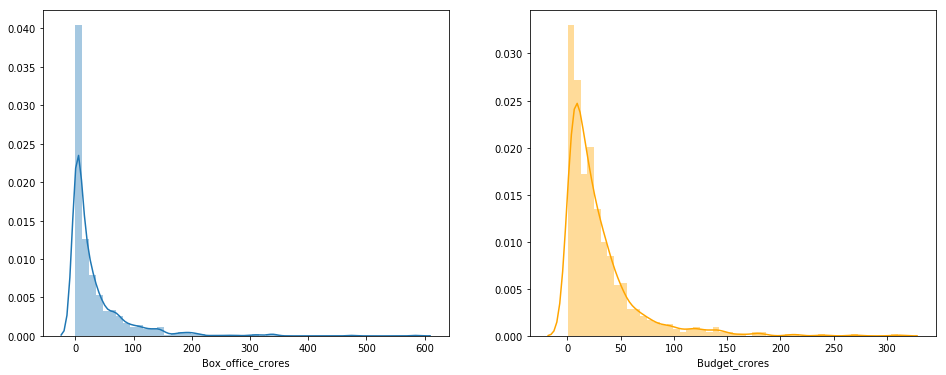

In [9]:
fig, ax =plt.subplots(1,2,figsize = (16, 6))
sns.distplot(Movie_df['Box_office_crores'],ax=ax[0])
sns.distplot(Movie_df['Budget_crores'],color = 'orange',ax=ax[1])
fig.show()


We can see that both box office collection and buget data is very skewed and therefore it is difficult to draw a conclusion from this graph. we need to normalize this data. Therefore we will be normalizing it using log transformation.

In [10]:
#creating log transformation for reveune
Movie_df['Log_Box_office_crores'] = np.log1p(Movie_df['Box_office_crores']) #we are not using log0 to avoid & and null value as there might be 0 value

#creating log transformation for budget
Movie_df['Log_Budget_crores'] = np.log1p(Movie_df['Budget_crores']) #we are not using log0 to avoid & and null value as there might be 0 value

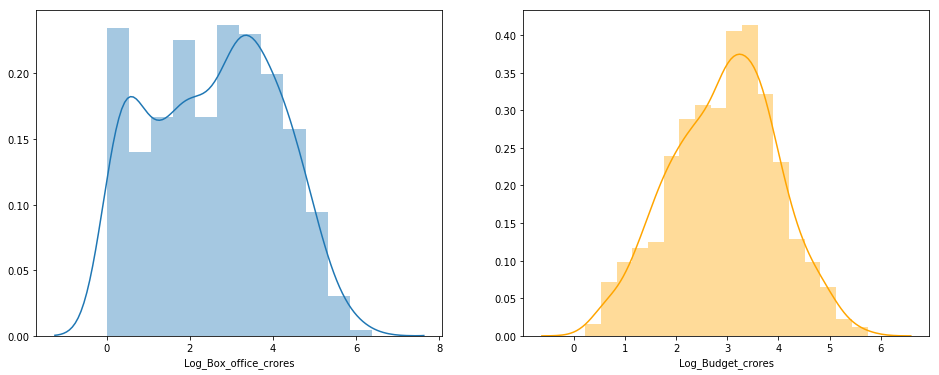

In [11]:
fig, ax =plt.subplots(1,2,figsize = (16, 6))
sns.distplot(Movie_df['Log_Box_office_crores'],ax=ax[0])
sns.distplot(Movie_df['Log_Budget_crores'],color = 'orange',ax=ax[1])
fig.show()


<center><u> Log transformation method made data normally distributed which has less skewness and kurtosis.</u></center>

***2.2. Relationship between Film Revenue and Budget.***

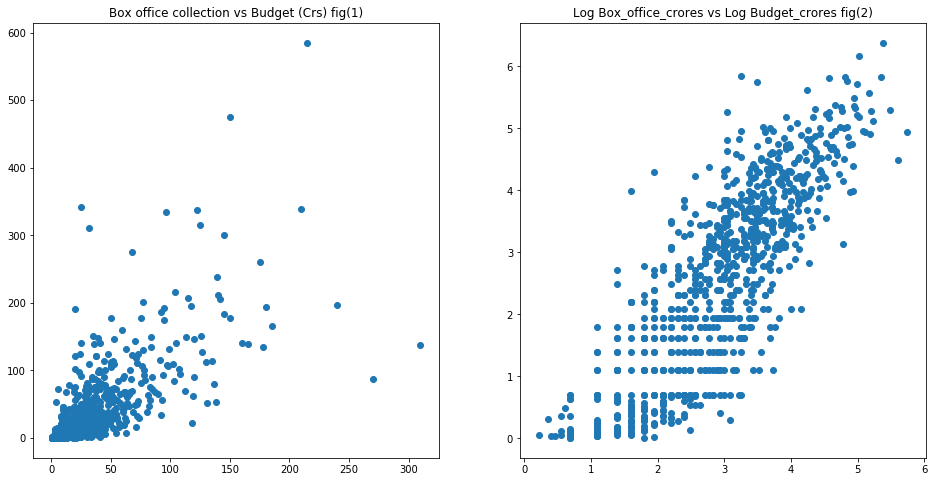

In [12]:
#let's create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(Movie_df['Budget_crores'], Movie_df['Box_office_crores'])
plt.title('Box office collection vs Budget (Crs) fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(Movie_df['Log_Budget_crores'], Movie_df['Log_Box_office_crores'])
plt.title('Log Box_office_crores vs Log Budget_crores fig(2)')
plt.show()

Fig(1, left side): we can see that they are a somewhat correlation between budget and revenue, but we are not clear.

Fig(2, right side): however this plot indicates that there is a strong correlation between both variables that are log transformation of revenue and log transformation of budget.

In [13]:
Movie_df['Budget_crores'].quantile([0.25,0.5, 0.75], interpolation='midpoint')

0.25     8.0
0.50    19.0
0.75    38.0
Name: Budget_crores, dtype: float64

In [14]:
Movie_df['Box_office_crores'].quantile([0.25,0.5, 0.75], interpolation='midpoint')

0.25     2.0
0.50    14.0
0.75    42.0
Name: Box_office_crores, dtype: float64

<u>Converting the budget into 7 categories ranges </u>

In [15]:
bins = [1, 5, 10, 20, 30, 50, 100,1000]
names = ['< 1', '1-5', '5-10', '10-20', '30-50','50-100','> 100']

Movie_df['Budget_crores_bins'] = pd.cut(Movie_df['Budget_crores'], bins, labels=names)
Movie_df['Budget_crores_bins'].value_counts()

5-10      183
30-50     144
1-5       132
< 1       124
10-20     122
50-100     92
> 100      41
Name: Budget_crores_bins, dtype: int64

***2.3. Relationship between the movie certificate and box office collection.***

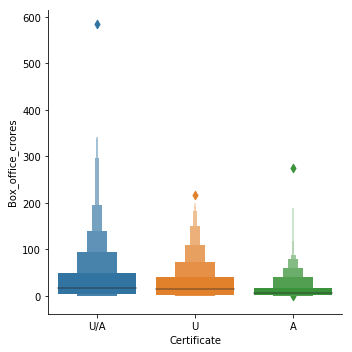

In [16]:
sns.catplot(x='Certificate', y='Box_office_crores',kind = "boxen", data=Movie_df);

<u> Most of the movies belongs to U/A certifcation category  </u>

***2.4. Relationship between release month and box office collection***

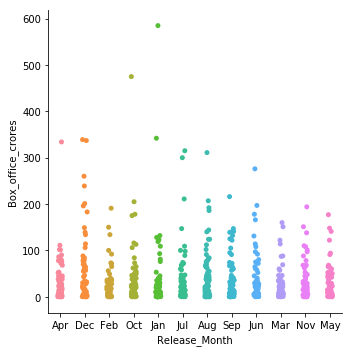

In [17]:
sns.catplot(x='Release_Month', y='Box_office_crores', data=Movie_df);

In [18]:
bins = [1989, 1995, 2000, 2005, 2010, 2015,2019]
names = ['< 1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015','2015-2019']
Movie_df['Release_Year_bins'] = pd.cut(Movie_df['Release_Year'], bins, labels=names)
Movie_df['Release_Year_bins'].value_counts()

2010-2015    322
2015-2019    223
2005-2010    220
2000-2005     72
1995-2000     13
< 1995         9
Name: Release_Year_bins, dtype: int64

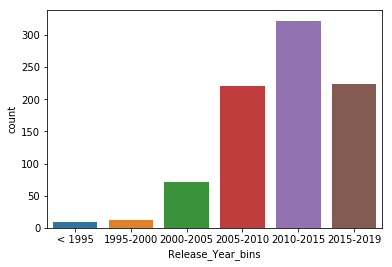

In [19]:
ax = sns.countplot(x="Release_Year_bins", data=Movie_df)


<u> Before Year 2000 only 22 movies available in the data. Around 90% movies in the data released after year 2005. </u>

***2.5. Top directors in terms of Box office collection***


In [20]:
grouped_Directors =  Movie_df.groupby('Director')['Box_office_crores'].agg({'Box_office_crores':'sum','Number_of_Movies':'count'}).reset_index()
grouped_Directors['per_movie_collection'] = grouped_Directors['Box_office_crores']/ grouped_Directors['Number_of_Movies']
Top_Directors = grouped_Directors.sort_values('Box_office_crores', ascending=False).head(5)
Top_Directors

,Director,Box_office_crores,Number_of_Movies,per_movie_collection
329,Rohit Shetty,1307.0,10,130.700000
40,Ali Abbas Zafar,966.0,5,193.200000
304,Rajkumar Hirani,946.0,4,236.500000
175,Kabir Khan,869.0,7,124.142857
358,Sanjay Leela Bhansali,841.0,5,168.200000


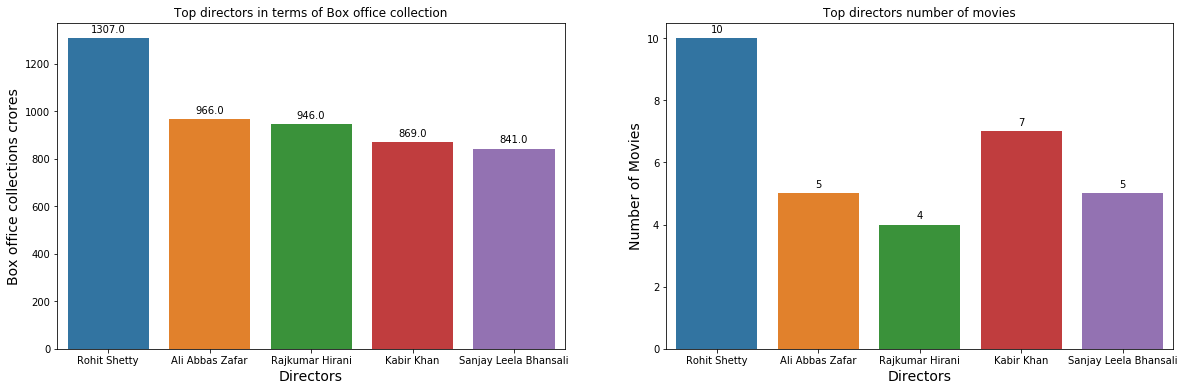

In [21]:
#we will be using blox pot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
splot = sns.barplot(x='Director', y='Box_office_crores', data=Top_Directors);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Top directors in terms of Box office collection');
plt.xlabel("Directors", size=14)
plt.ylabel("Box office collections crores", size=14)

plt.subplot(1, 2, 2)
splot = sns.barplot(x='Director', y='Number_of_Movies', data=Top_Directors);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Top directors number of movies');
plt.xlabel("Directors", size=14)
plt.ylabel("Number of Movies", size=14)
plt.show()

<u><center> Rohit Shetty, Ali Abbas Zafar, Rajkumar Hirani, Kabir Khan, Sanjay Leela Bhansali are successfull directors in bollywood </center></u>

***2.6.Top Producers in terms of Box office collection***

In [22]:
grouped_Producer =  Movie_df.groupby('Producer')['Box_office_crores'].agg({'Box_office_crores':'sum','Number_of_Movies':'count'}).reset_index()
Top_Producer = grouped_Producer.sort_values('Box_office_crores', ascending=False).head(5)
Top_Producer['Per_movie_collection'] = round(Top_Producer['Box_office_crores']/Top_Producer['Number_of_Movies'],1)
Top_Producer = Top_Producer[Top_Producer['Number_of_Movies']>5]
Top_Producer

,Producer,Box_office_crores,Number_of_Movies,Per_movie_collection
11,Aditya Chopra,3361.35,45,74.7
69,Bhushan Kumar,2066.00,47,44.0
244,Sajid Nadiadwala,1563.00,19,82.3
131,Karan Johar,1260.00,20,63.0
289,Sunil Lulla,959.00,19,50.5


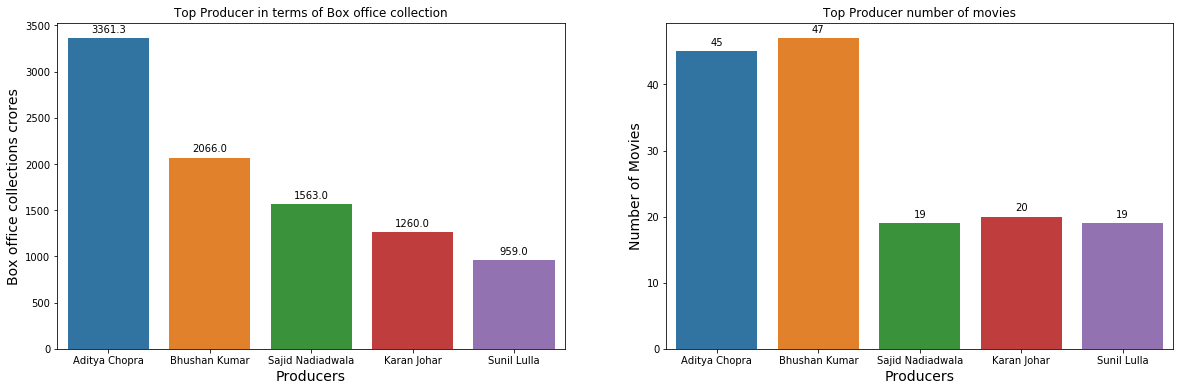

In [23]:
#we will be using blox pot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
splot = sns.barplot(x='Producer', y='Box_office_crores', data=Top_Producer);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Top Producer in terms of Box office collection');
plt.xlabel("Producers", size=14)
plt.ylabel("Box office collections crores", size=14)

plt.subplot(1, 2, 2)
splot = sns.barplot(x='Producer', y='Number_of_Movies', data=Top_Producer);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Top Producer number of movies');
plt.xlabel("Producers", size=14)
plt.ylabel("Number of Movies", size=14)
plt.show()

***Aditya Chopra*** has the hightest grossing box office collecton <br>
***Sajid Nadiadwala*** has the hightest per movie box office collection 

***2.7.Top Profitable movies***

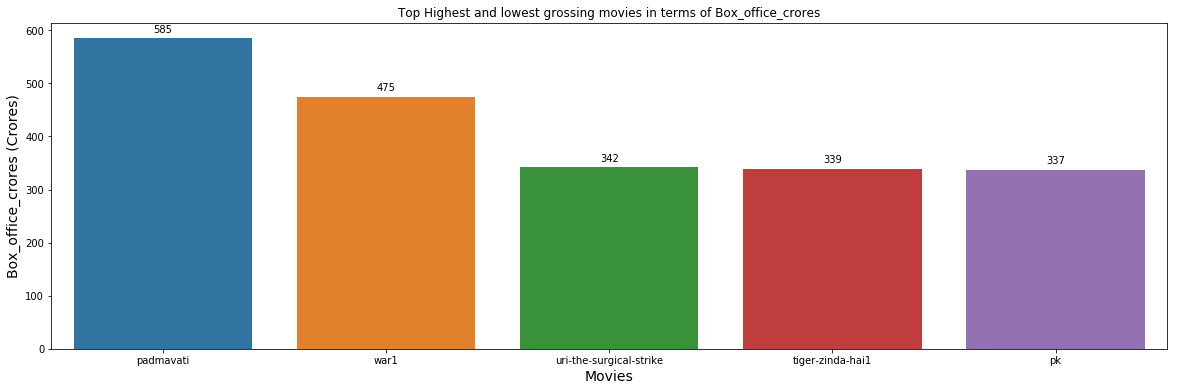

In [24]:
Top_Movies = Movie_df.sort_values('Box_office_crores', ascending=False)[['Movie','Box_office_crores']].head(5)

#we will be using blox pot
plt.figure(figsize=(20, 6))
splot = sns.barplot(x='Movie', y='Box_office_crores', data=Top_Movies);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Top Highest and lowest grossing movies in terms of Box_office_crores');
plt.xlabel("Movies", size=14)
plt.ylabel("Box_office_crores (Crores)", size=14)
plt.show()

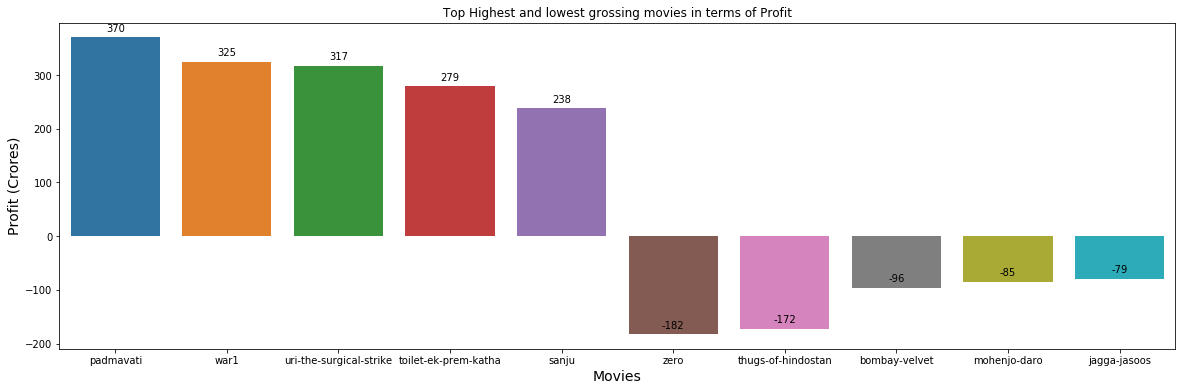

In [25]:
Top_Movies = Movie_df.sort_values('Profit', ascending=False)[['Movie','Profit']].head(5)
Bottom_Movies = Movie_df.sort_values('Profit', ascending=True)[['Movie','Profit']].head(5)
Top_Bottom_Movies = pd.concat([Top_Movies,Bottom_Movies])
Top_Bottom_Movies

#we will be using blox pot
plt.figure(figsize=(20, 6))
splot = sns.barplot(x='Movie', y='Profit', data=Top_Bottom_Movies);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Top Highest and lowest grossing movies in terms of Profit');
plt.xlabel("Movies", size=14)
plt.ylabel("Profit (Crores)", size=14)
plt.show()

<u><center> "Padmavati" and "War" highest grossing movies in box office collection and profits </center></u>

***2.8.Top Actor/Actress all time in terms of Box office collection movies and number of movies***

In [26]:
Movie_df.columns

Index(['Movie', 'Box_office_crores', 'Budget_crores', 'Certificate',
       'Release_Date', 'Run_time_mins', 'Director', 'Producer', 'Lead_Actor1',
       'Lead_Actor2', 'Lead_Actor3', 'Genre1', 'Genre2', 'Genre3',
       'Release_Month', 'Release_Year', 'Profit', 'Log_Box_office_crores',
       'Log_Budget_crores', 'Budget_crores_bins', 'Release_Year_bins'],
      dtype='object')

In [27]:
df1 = Movie_df[['Lead_Actor1','Box_office_crores','Budget_crores']]
df1.columns = ['Lead_Actor','Box_office_crores','Budget_crores']
df2 = Movie_df[['Lead_Actor2','Box_office_crores','Budget_crores']]
df2.columns = ['Lead_Actor','Box_office_crores','Budget_crores']
df3 = Movie_df[['Lead_Actor3','Box_office_crores','Budget_crores']]
df3.columns = ['Lead_Actor','Box_office_crores','Budget_crores']

df4 = pd.concat([df1,df2,df3])
df4.head(10)

df4.groupby

grouped_cast =  df4.groupby('Lead_Actor')['Box_office_crores'].agg({'Box_office_crores':'sum','Budget_crores':'sum', 'Number_of_Movies':'count'}).reset_index()
Top_cast = grouped_cast.sort_values('Box_office_crores', ascending=False).head(5)
Top_cast['per_movie_collection'] = round(Top_cast['Box_office_crores']/ Top_cast['Number_of_Movies'],1)
Top_cast

,Lead_Actor,Box_office_crores,Budget_crores,Number_of_Movies,per_movie_collection
40,Akshay Kumar,4073.00,4073.00,51,79.9
684,Salman Khan,3469.00,3469.00,38,91.3
340,Katrina Kaif,2757.00,2757.00,30,91.9
168,Deepika Padukone,2153.00,2153.00,21,102.5
335,Kareena Kapoor Khan,2087.06,2087.06,34,61.4


In [28]:
df_cast = Movie_df.loc[Movie_df['Lead_Actor1'].isin(Top_cast['Lead_Actor'].head(5))] 

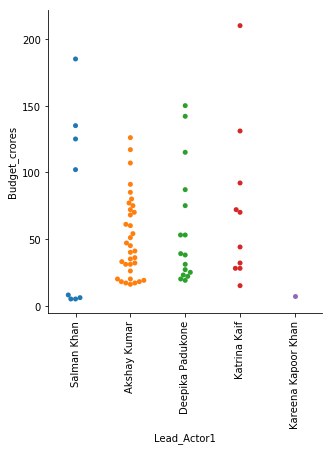

In [29]:
g = sns.catplot(x='Lead_Actor1', y='Budget_crores',kind="swarm", data= df_cast);
g.set_xticklabels(rotation=90)


<u> Akshay kumar has performed in many low budget movies where as Salman Khan has worked mostly in high budgets </u>

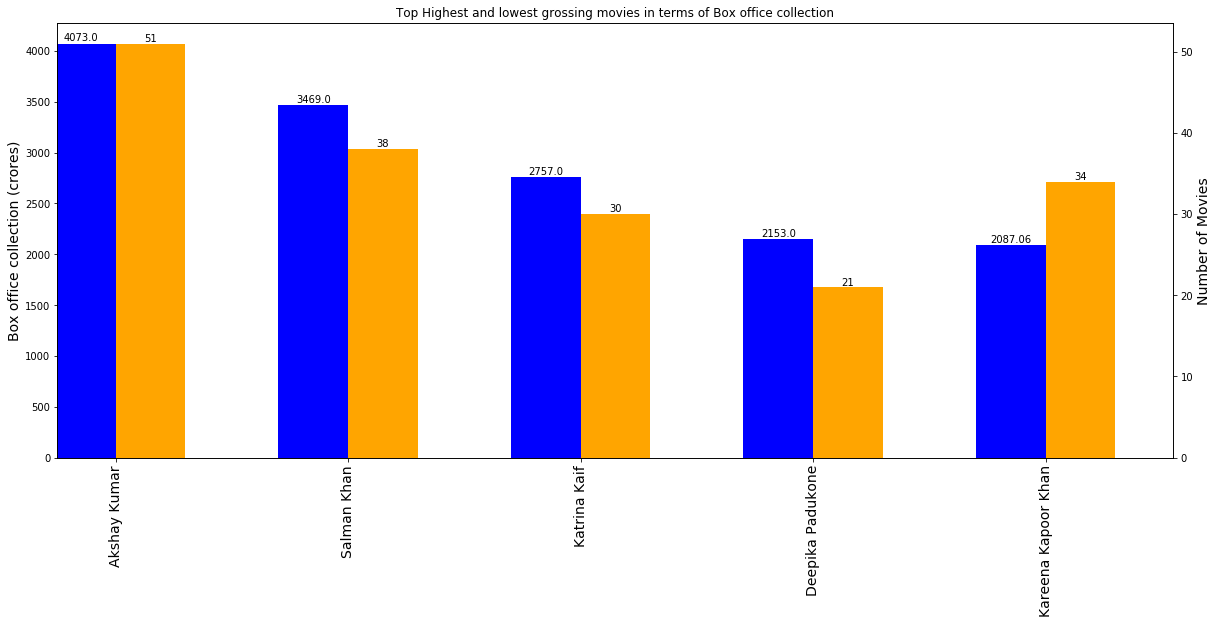

In [30]:
fig = plt.figure(figsize=(20, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

#plt.bar(Top_cast['Box_office_crores'],color='blue', ax=ax, width=width, position=1)
#plt.bar(Top_cast['Number_of_Movies'],color='orange', ax=ax2, width=width, position=0)
Top_cast.Box_office_crores.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
Top_cast.Number_of_Movies.plot(kind='bar', color='orange',ax=ax2, width=width, position=0)

plt.title('Top Highest and lowest grossing movies in terms of Box office collection');
ax.set_ylabel('Box office collection (crores)', size=14)
ax2.set_ylabel('Number of Movies', size=14)
ax.set_xticklabels(Top_cast['Lead_Actor'],fontsize=14)

rects = ax.patches
rects2 = ax2.patches

# Make some labels.
labels = Top_cast['Box_office_crores']
labels2 = Top_cast['Number_of_Movies']

for rect,label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
    
for rect2, label2 in zip(rects2, labels2):
    height = rect2.get_height()
    ax2.text(rect2.get_x() + rect2.get_width() / 2, height , label2,
            ha='center', va='bottom')
    
plt.show()

***Akshay kumar, Salman Khan, Katrina kaif, Deepika Padukone*** are the most successfull actor/actress in the industry

***2.9.Top Genres box office collection movies and number of movies***

In [31]:
df1 = Movie_df[['Genre1','Box_office_crores']]
df1.columns = ['Genre','Box_office_crores']
df2 = Movie_df[['Genre2','Box_office_crores']]
df2.columns = ['Genre','Box_office_crores']
df3 = Movie_df[['Genre3','Box_office_crores']]
df3.columns = ['Genre','Box_office_crores']

df4 = pd.concat([df1,df2,df3])
df4.head(10)

df4.groupby

grouped_genre =  df4.groupby('Genre')['Box_office_crores'].agg({'Box_office_crores':'sum','Number_of_Movies':'count'}).reset_index()
Top_Genre = grouped_genre.sort_values('Box_office_crores', ascending=False).head(10)
Top_Genre

,Genre,Box_office_crores,Number_of_Movies
7,Drama,22028.40,666
0,Action,13818.99,271
4,Comedy,13543.65,383
16,Romance,9450.69,289
5,Crime,5923.50,184
21,Thriller,4198.92,141
1,Adventure,3947.84,74
14,Musical,2165.28,56
11,History,1921.66,21
3,Biography,1829.14,31


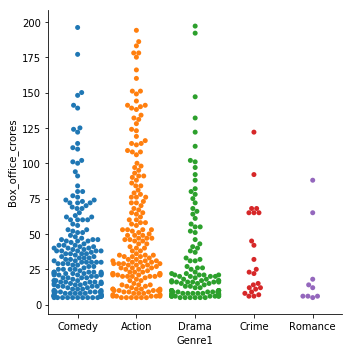

In [32]:
sns.catplot(x='Genre1', y='Box_office_crores',kind="swarm", data= Movie_df.loc[(Movie_df['Box_office_crores'] >= 5) & (Movie_df['Box_office_crores'] <= 200) & Movie_df['Genre1'].isin(Top_Genre['Genre'].head(5))] );

<u> Most Movies belongs to Comedy or Action category. </u>

In [33]:
Movie_df.columns

Index(['Movie', 'Box_office_crores', 'Budget_crores', 'Certificate',
       'Release_Date', 'Run_time_mins', 'Director', 'Producer', 'Lead_Actor1',
       'Lead_Actor2', 'Lead_Actor3', 'Genre1', 'Genre2', 'Genre3',
       'Release_Month', 'Release_Year', 'Profit', 'Log_Box_office_crores',
       'Log_Budget_crores', 'Budget_crores_bins', 'Release_Year_bins'],
      dtype='object')

## 3. Data Transformation

***3.1. As the inflation will play role collection and budget numbers over the period of time, Calculating profit percentage of each movie***

In [34]:
Movie_df['Profict_pct'] = Movie_df['Profit']/Movie_df['Budget_crores']

In [35]:
Movie_df['Profict_pct'].quantile([0.25,0.5, 0.6,0.65,.7], interpolation='nearest')

0.25   -0.750000
0.50   -0.277778
0.60   -0.090909
0.65    0.000000
0.70    0.153846
Name: Profict_pct, dtype: float64

Around 65 percentage movies in the data has negative profit percentage value.

***3.2. Subseting the movies dataset based on the box office collection greater then 1 Crs and released after 2000***

In [36]:
Movie_df1 = Movie_df.loc[ (Movie_df['Box_office_crores'] > 1) & (Movie_df['Release_Year'] > 2000)]
Movie_df1.shape

(672, 22)

***3.3. Dividing Profit percentage into two categories, Movies with more then 10% profit are 1 (successful) and rest are in 0 (unsuccessful) category***

In [37]:
bins = [-np.inf ,0.1, np.inf]
names = [0, 1]

Movie_df1['Profict_pct_bins'] = pd.cut(Movie_df1['Profict_pct'], bins, labels=names)
Movie_df1['Profict_pct_bins'].value_counts()

0    412
1    260
Name: Profict_pct_bins, dtype: int64

Text(0,0.5,'Profict_pct_bins')

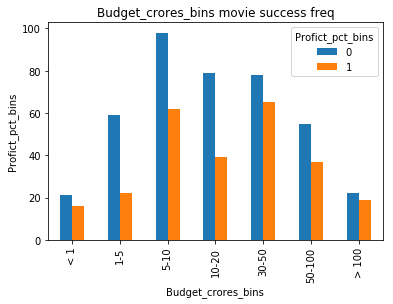

In [38]:
pd.crosstab(Movie_df1.Budget_crores_bins,Movie_df1.Profict_pct_bins).plot(kind='bar')
plt.title('Budget_crores_bins movie success freq')
plt.xlabel('Budget_crores_bins')
plt.ylabel('Profict_pct_bins')

<u> Interestingly in non of movie budget range, 1 (Success) is higher then the 0 (Unsuccessful). And in all the ranges successful movies are present <\u>

In [39]:
Movie_df1.columns

Index(['Movie', 'Box_office_crores', 'Budget_crores', 'Certificate',
       'Release_Date', 'Run_time_mins', 'Director', 'Producer', 'Lead_Actor1',
       'Lead_Actor2', 'Lead_Actor3', 'Genre1', 'Genre2', 'Genre3',
       'Release_Month', 'Release_Year', 'Profit', 'Log_Box_office_crores',
       'Log_Budget_crores', 'Budget_crores_bins', 'Release_Year_bins',
       'Profict_pct', 'Profict_pct_bins'],
      dtype='object')

***3.3. Converting the lead actor1,lead actor2, lead actor3 into the categories of Best, Good, Avg and Bad based on the historical box office collection by the lead actors***

In [40]:
cast = grouped_cast.sort_values('Box_office_crores', ascending=False) ## using the grouped_cast variable created before
cast['Box_office_crores'].quantile([0.25,0.8,.96,.99,1], interpolation='nearest')


0.25       1.0
0.80      65.0
0.96     595.0
0.99    1632.0
1.00    4073.0
Name: Box_office_crores, dtype: float64

In [41]:
bins = [0, 65, 595, 1632.0, 4073]
labels=["Bad", "Avg", "Good","Best"]
cast['Bins'] = pd.cut(cast['Box_office_crores'],bins=bins, labels=labels)
cast = cast[['Lead_Actor','Bins']]
cast['Bins'].value_counts()

Bad     734
Avg     145
Good     28
Best      9
Name: Bins, dtype: int64

In [42]:
cast.columns = ['Lead_Actor1', 'Lead_Actor1_Bins']
Movie_df1 = pd.merge(Movie_df1,cast,how = 'left',on='Lead_Actor1')
len(Movie_df1.columns)

24

Text(0,0.5,'Profict_pct_bins')

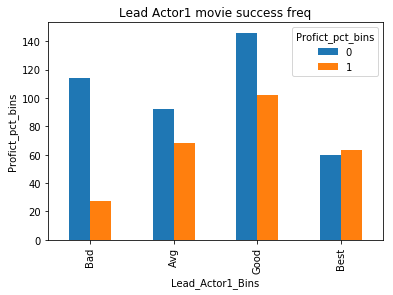

In [43]:
pd.crosstab(Movie_df1.Lead_Actor1_Bins,Movie_df1.Profict_pct_bins).plot(kind='bar')
plt.title('Lead Actor1 movie success freq')
plt.xlabel('Lead_Actor1_Bins')
plt.ylabel('Profict_pct_bins')

In [44]:
cast.columns = ['Lead_Actor2', 'Lead_Actor2_Bins']
Movie_df1 = pd.merge(Movie_df1,cast,how = 'left',on='Lead_Actor2')
len(Movie_df1.columns)

25

Text(0,0.5,'Profict_pct_bins')

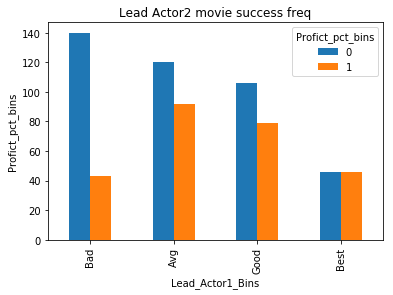

In [45]:
pd.crosstab(Movie_df1.Lead_Actor2_Bins,Movie_df1.Profict_pct_bins).plot(kind='bar')
plt.title('Lead Actor2 movie success freq')
plt.xlabel('Lead_Actor1_Bins')
plt.ylabel('Profict_pct_bins')

In [46]:
cast.columns = ['Lead_Actor3', 'Lead_Actor3_Bins']
Movie_df1 = pd.merge(Movie_df1,cast,how = 'left',on='Lead_Actor3')
len(Movie_df1.columns)

26

In [47]:
Movie_df1.head()

,Movie,Box_office_crores,Budget_crores,Certificate,Release_Date,Run_time_mins,Director,Producer,Lead_Actor1,Lead_Actor2,...,Profit,Log_Box_office_crores,Log_Budget_crores,Budget_crores_bins,Release_Year_bins,Profict_pct,Profict_pct_bins,Lead_Actor1_Bins,Lead_Actor2_Bins,Lead_Actor3_Bins
0,sanju,334.0,96.0,U/A,2019-04-12,161,Rajkumar Hirani,Rajkumar Hirani,Anushka Sharma,Sonam Kapoor,...,238.0,5.814131,4.574711,50-100,2015-2019,2.479167,1,Best,Good,Good
1,3-idiots,201.0,77.0,U/A,2009-12-24,171,Rajkumar Hirani,Vidhu Vinod Chopra,Aamir Khan,R Madhavan,...,124.0,5.308268,4.356709,50-100,2005-2010,1.610390,1,Good,Avg,Best
2,black-friday,4.0,4.0,U/A,2007-02-09,143,Anurag Kashyap,Arindam Mitra,Kay Kay Menon,Nawazuddin Siddiqui,...,0.0,1.609438,1.609438,< 1,2005-2010,0.000000,0,Bad,Avg,Bad
3,andhadhun,73.0,32.0,U/A,2018-10-05,139,Sriram Raghavan,Sanjay Routray,Tabu Hashmi,Ayushmann Khurrana,...,41.0,4.304065,3.496508,30-50,2015-2019,1.281250,1,Avg,Avg,Avg
4,rang-de-basanti,53.0,28.0,U/A,2006-01-26,171,Rakeysh Omprakash Mehra,David Reid,Aamir Khan,Siddharth Narayan,...,25.0,3.988984,3.367296,10-20,2005-2010,0.892857,1,Good,Avg,Avg


***3.4. We have 23 different categories of Genres, Therefore converting them into four categories based on the historical box office collection***

In [48]:
grouped_genre.head() ## using the grouped_cast variable created before

,Genre,Box_office_crores,Number_of_Movies
0,Action,13818.99,271
1,Adventure,3947.84,74
2,Animation,19.26,11
3,Biography,1829.14,31
4,Comedy,13543.65,383


In [49]:
Genre = grouped_genre.sort_values('Box_office_crores', ascending=False)
Genre['Box_office_crores'].quantile([0.25,0.8, 0.95,1], interpolation='nearest')


0.25      286.51
0.80     5923.50
0.95    13818.99
1.00    22028.40
Name: Box_office_crores, dtype: float64

In [50]:
bins = [0, 5924, 13819, 22029]
labels=["Bad", "Avg", "Good"]
Genre['Bins'] = pd.cut(Genre['Box_office_crores'],bins=bins, labels=labels)
Genre = Genre[['Genre','Bins']]
Genre['Bins'].value_counts()

Bad     19
Avg      3
Good     1
Name: Bins, dtype: int64

In [51]:
Genre.columns = ['Genre1', 'Genre1_Bins']
Movie_df1 = pd.merge(Movie_df1,Genre,how = 'left',on='Genre1')
len(Movie_df1.columns)

27

In [52]:
Genre.columns = ['Genre2', 'Genre2_Bins']
Movie_df1 = pd.merge(Movie_df1,Genre,how = 'left',on='Genre2')
len(Movie_df1.columns)

28

In [53]:
Genre.columns = ['Genre3', 'Genre3_Bins']
Movie_df1 = pd.merge(Movie_df1,Genre,how = 'left',on='Genre3')
len(Movie_df1.columns)

29

***3.5. Converting directors into four categories based on the historical box office collection***

In [57]:
Directors = grouped_Directors.sort_values('Box_office_crores', ascending=False)
Directors['Box_office_crores'].quantile([0.25,0.5, 0.8,.9,.98,1], interpolation='nearest')


0.25       1.0
0.50      10.0
0.80     110.0
0.90     189.0
0.98     427.0
1.00    1307.0
Name: Box_office_crores, dtype: float64

In [58]:
bins = [0, 110, 189, 427.0, 1307]
labels=["Bad", "Avg", "Good","Best"]
Directors['Bins'] = pd.cut(Directors['Box_office_crores'],bins=bins, labels=labels)
Directors = Directors[['Director','Bins']]
#Directors.head(5)
Directors['Bins'].value_counts()

Bad     366
Avg      46
Good     36
Best      9
Name: Bins, dtype: int64

In [59]:
Directors.columns = ['Director', 'Director_Bins']
Movie_df1 = pd.merge(Movie_df1,Directors,how = 'left',on='Director')
len(Movie_df1.columns)

30

In [60]:
Movie_df1.columns

Index(['Movie', 'Box_office_crores', 'Budget_crores', 'Certificate',
       'Release_Date', 'Run_time_mins', 'Director', 'Producer', 'Lead_Actor1',
       'Lead_Actor2', 'Lead_Actor3', 'Genre1', 'Genre2', 'Genre3',
       'Release_Month', 'Release_Year', 'Profit', 'Log_Box_office_crores',
       'Log_Budget_crores', 'Budget_crores_bins', 'Release_Year_bins',
       'Profict_pct', 'Profict_pct_bins', 'Lead_Actor1_Bins',
       'Lead_Actor2_Bins', 'Lead_Actor3_Bins', 'Genre1_Bins', 'Genre2_Bins',
       'Genre3_Bins', 'Director_Bins'],
      dtype='object')

Text(0,0.5,'Profict_pct_bins')

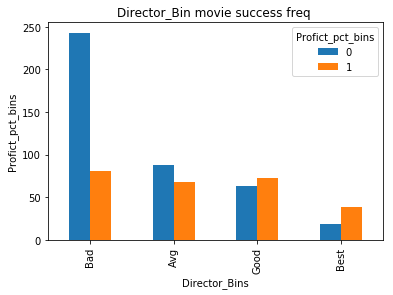

In [61]:
pd.crosstab(Movie_df1.Director_Bins,Movie_df1.Profict_pct_bins).plot(kind='bar')
plt.title('Director_Bin movie success freq ')
plt.xlabel('Director_Bins')
plt.ylabel('Profict_pct_bins')

In [62]:
Producer = grouped_Producer.sort_values('Box_office_crores', ascending=False)
Producer['Box_office_crores'].quantile([0.25, 0.8,.94,.98,1], interpolation='nearest')

0.25       1.00
0.80      96.00
0.94     334.00
0.98     717.00
1.00    3361.35
Name: Box_office_crores, dtype: float64

In [63]:
bins = [0, 96, 334, 717, 3362]
labels=["Bad", "Avg", "Good","Best"]
Producer['Bins'] = pd.cut(Producer['Box_office_crores'],bins=bins, labels=labels)
Producer = Producer[['Producer','Bins']]
#Producer.head(5)
Producer['Bins'].value_counts()

Bad     263
Avg      46
Good     13
Best      7
Name: Bins, dtype: int64

In [64]:
Producer.columns = ['Producer', 'Producer_Bins']
Movie_df1 = pd.merge(Movie_df1,Producer,how = 'left',on='Producer')
len(Movie_df1.columns)

31

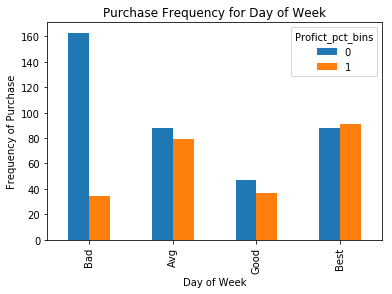

In [65]:
pd.crosstab(Movie_df1.Producer_Bins,Movie_df1.Profict_pct_bins).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

## 4. Predictive model building

Budling the classfication model on using 'Profict_pct_bins' as dependent variable and Lead_Actor, Genre, Director, Producer, Budget,Release month as independent variable

In [66]:
Movie_df1.columns

Index(['Movie', 'Box_office_crores', 'Budget_crores', 'Certificate',
       'Release_Date', 'Run_time_mins', 'Director', 'Producer', 'Lead_Actor1',
       'Lead_Actor2', 'Lead_Actor3', 'Genre1', 'Genre2', 'Genre3',
       'Release_Month', 'Release_Year', 'Profit', 'Log_Box_office_crores',
       'Log_Budget_crores', 'Budget_crores_bins', 'Release_Year_bins',
       'Profict_pct', 'Profict_pct_bins', 'Lead_Actor1_Bins',
       'Lead_Actor2_Bins', 'Lead_Actor3_Bins', 'Genre1_Bins', 'Genre2_Bins',
       'Genre3_Bins', 'Director_Bins', 'Producer_Bins'],
      dtype='object')

In [67]:
Movie_df2 = Movie_df1[['Log_Budget_crores','Certificate','Run_time_mins','Director_Bins','Lead_Actor1_Bins','Lead_Actor2_Bins','Lead_Actor3_Bins',
               'Genre1','Genre2','Release_Month','Profict_pct_bins']]

#'Genre1_Bins', 'Genre2_Bins', 'Genre3_Bins'

In [68]:
Movie_df2 = pd.get_dummies(Movie_df2, columns =['Log_Budget_crores','Certificate','Director_Bins','Lead_Actor1_Bins', 'Lead_Actor2_Bins', 'Lead_Actor3_Bins','Genre1','Genre2','Release_Month'])

In [69]:
Movie_df2.head()

,Run_time_mins,Profict_pct_bins,Log_Budget_crores_1.0986122886681098,Log_Budget_crores_1.3862943611198906,Log_Budget_crores_1.6094379124341003,Log_Budget_crores_1.791759469228055,Log_Budget_crores_1.9459101490553132,Log_Budget_crores_2.0794415416798357,Log_Budget_crores_2.1972245773362196,Log_Budget_crores_2.302585092994046,...,Release_Month_Dec,Release_Month_Feb,Release_Month_Jan,Release_Month_Jul,Release_Month_Jun,Release_Month_Mar,Release_Month_May,Release_Month_Nov,Release_Month_Oct,Release_Month_Sep
0,161,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,143,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,139,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,171,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 4.1. Logistic Regression Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [71]:
x = Movie_df2.drop(columns=['Profict_pct_bins'])
y = Movie_df2['Profict_pct_bins']
X_train,X_test,y_train,y_test= train_test_split( x, y, test_size = 0.25, random_state = 1) 
print(X_train.shape)
print(X_test.shape)


(504, 200)
(168, 200)


In [72]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
x_pred=logistic_regression.predict(X_train)


In [73]:
#Train Confusion Matrix
cnf_matrix = confusion_matrix(y_train, x_pred)
print(cnf_matrix)

[[291  23]
 [ 64 126]]


In [74]:
#Test Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[81 17]
 [35 35]]


In [75]:
# Accuracy on test data set
print("Train Accuracy:",metrics.accuracy_score(y_train, x_pred))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.8273809523809523
Test Accuracy: 0.6904761904761905


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.83      0.76        98
          1       0.67      0.50      0.57        70

avg / total       0.69      0.69      0.68       168



***Logistic regression model is giving the train accuracy of around 82% and test accuracy of around 70%***

### 4.2. Decision Tree Model

In [77]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [78]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [79]:
print("Train Accuracy:",metrics.accuracy_score(y_train, x_pred))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.8273809523809523
Test Accuracy: 0.6964285714285714


### 4.3 Naive Bayes Model

In [81]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
#print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.5198412698412699
accuracy_score on test dataset :  0.49404761904761907


### 4.5 Random forest

In [82]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestClassifier 
  
 # create regressor object 
clf = RandomForestClassifier(n_estimators = 100,random_state =50,  max_features = "auto") 
  
# fit the regressor with x and y data 
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [83]:
print("Train Accuracy:",metrics.accuracy_score(y_train, x_pred))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.8273809523809523
Test Accuracy: 0.7023809523809523


In [84]:
# Test confusion matrix
print(confusion_matrix(y_test, y_pred))


[[86 12]
 [38 32]]


In [85]:
feature_imp = pd.Series(clf.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False) 
feature_imp.head(10)

Run_time_mins           0.097228
Lead_Actor3_Bins_Bad    0.036192
Director_Bins_Bad       0.035253
Genre1_Comedy           0.022971
Lead_Actor1_Bins_Bad    0.022445
Lead_Actor3_Bins_Avg    0.021755
Genre1_Action           0.021456
Director_Bins_Good      0.021231
Lead_Actor1_Bins_Avg    0.019701
Lead_Actor2_Bins_Avg    0.019306
dtype: float64

## 5. Results highlights

1. All the models (except Naive bayes) are predicting test accuracy in the similar range of 70%. <br>
     <br>
2. Producers bins and Genre3 are not helping in improving the accuracy of the model, therefore not used them in final model <br>
     <br>
3. From Random forest model variable importance; Run time, Lead actor and director are coming as high on importance <br>
     <br>
4. Handling the Large categories of actors, directors and producers was challening task. I have small dataset records as well (~650). Therefore had to convert them into sub categories. <br>
     <br>
5. Logistic regression model is giving the decent fit in comparison with other decision tree and random forest, therefore we can use Logisic model for predicting the success of the movie.
   
   

## Thank You